In [153]:
import pandas as pd 
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

### Read CSV file
- source: `lens.org`
- type: `scholarly works`
- max rows: `1000`
- search term: `"technological innovation"`
- flags: `has abstract`
- date range: `2020-today`
- Anmerkung: betriebswirtschaftlich technologische Innovation herausfiltern?

In [154]:
file = "./technological-innovations.csv"
df  =  pd.read_csv( file )

### Display loaded data

In [155]:
df.shape

(1000, 10)

In [156]:
df.head(10)

,Lens ID,Title,Date Published,Publication Year,Publication Type,Author/s,Abstract,Fields of Study,Keywords,Citing Works Count
0,000-084-617-101-137,ATCI (1) - The Impact of Technological Innovat...,2021-06-24,2021,book,Xia Zhong,The use of computers in people’s work and life...,The Internet; Technological change; Standard o...,NaN,0
1,000-153-782-326-117,The Effect of Corporate Social Responsibility ...,2021-06-29,2021,journal article,Jun Huang; Peijun Xie; Yating Zeng; Yun Li,The implementation of innovation-driven strate...,Shareholder; Corporate social responsibility; ...,NaN,1
2,000-159-349-888-829,Financial sustainability of the construction f...,2020-12-01,2020,conference proceedings article,Hui Shan Lee; Sin Yee Lee; Wai-Mun Har; Shen Yap,As the fourth industrial revolution (IR 4.0) m...,Business; Revenue; Productivity; Quality (busi...,NaN,1
3,000-283-265-401-188,"Financial agglomeration, technological innovat...",NaN,2021,journal article,Xuefeng Li; Dalai Ma,Abstract Based on the panel data of 30 Chinese...,Finance; Economies of agglomeration; Econometr...,NaN,15
4,000-361-747-666-622,Study on incentive and supervision mechanisms ...,2020-08-25,2020,journal article,Jiawei Liu; Guanghong Ma,The high uncertainty of technological innovati...,Information asymmetry; Business; Project manag...,NaN,8
5,000-497-940-746-23X,Teknolojik İnovasyona Yönelik Uyumda Tüketici ...,2021-03-28,2021,journal article,Emine Şenbabaoğlu Danacı; Nurettin Parıltı,Purpose - Although a new technological innovat...,Psychology; Marketing; Value (ethics); Test (a...,NaN,0
6,000-653-310-870-537,Information Systems Governance and Industry 4....,NaN,2021,book chapter,Pedro Fernandes da Anunciação; Fernando Miguel...,<jats:p>The information society requires gover...,Link (knot theory); Business; Information syst...,NaN,1
7,000-767-911-071-883,System Dynamics Modeling of Logistics Hub Capa...,2020-04-16,2020,book chapter,Alberto De Marco; Hussein Fakhry; Marco Postor...,This paper proposes a System Dynamics (SD) mod...,Decision support system; Scheduling (productio...,NaN,0
8,000-776-059-798-423,Influence of Financialization of Heavily Pollu...,2021-12-17,2021,journal article,Yingying Zhou; Yuehan Du; Fengyi Lei; Ziru Su;...,In the wake of the acceleration of China's ind...,Financialization; Arbitrage; Business; Economi...,environmental pollution; financialization; hea...,2
9,000-822-933-331-817,Barriers to the Adoption of Technological Inno...,2020-08-27,2020,journal article,Tanja C. Link; Beverly Reece,"Over 600,000 criminal justice involved individ...",Criminal justice; Political science; State (po...,case study; community supervision; corrections...,3


In [157]:
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_widgets()

### Adding Columns

In [158]:
df['length'] = df['Abstract'].str.len()

### Describe Dataset

In [159]:
df.describe(include="O").T

,count,unique,top,freq
Lens ID,1000,1000,000-084-617-101-137,1
Title,1000,990,Effects of the institutional change based on d...,2
Date Published,861,498,2021-02-03,8
Publication Type,878,8,journal article,700
Author/s,988,960,Mario Coccia,5
Abstract,1000,987,Political systems shape institutions and gover...,3
Fields of Study,1000,992,Business; Parallels; Industrial organization,2
Keywords,168,168,environmental pollution; financialization; hea...,1


In [160]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Publication Year,1000.0,2020.936,0.778788,2020.0,2020.0,2021.0,2022.0,2022.0
Citing Works Count,1000.0,3.132,9.924872,0.0,0.0,0.0,2.0,117.0
length,1000.0,1241.022,534.770129,92.0,914.5,1216.0,1551.0,3523.0


### Checking Missing Data

In [161]:
df.isna().sum()

Lens ID                 0
Title                   0
Date Published        139
Publication Year        0
Publication Type      122
Author/s               12
Abstract                0
Fields of Study         0
Keywords              832
Citing Works Count      0
length                  0
dtype: int64

### Resolve Missing Data

In [162]:
df["Author/s"].fillna('unknown', inplace=True)

### Explode Author/s

In [163]:
df['authors_split'] = df["Author/s"].str.split(pat=";")

In [164]:
df_exploded = df.explode("authors_split")

### Explority Analysis Metadata

<AxesSubplot:>

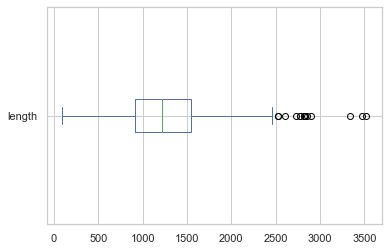

In [165]:
df['length'].plot(kind='box',vert=False)

In [166]:
df.groupby('Publication Year').size()

Publication Year
2020    337
2021    390
2022    273
dtype: int64

<AxesSubplot:ylabel='Frequency'>

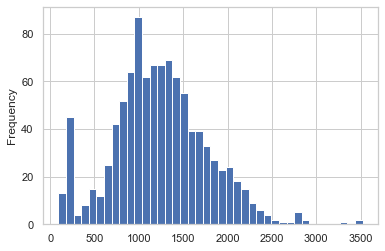

In [167]:
df['length'].plot(kind='hist', bins=40)

In [168]:
import seaborn as sns
sns.set_theme(style="whitegrid")

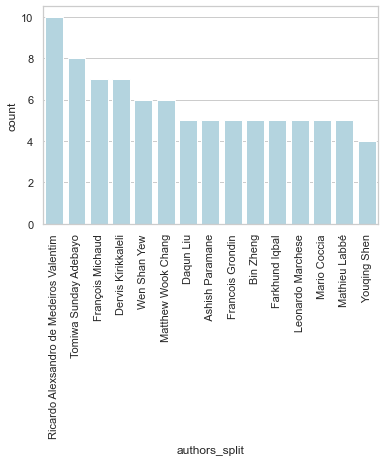

In [169]:

ax = sns.countplot(x="authors_split", data=df_exploded[df_exploded['authors_split'] != "unknown"], order=df_exploded[df_exploded['authors_split'] != "unknown"]['authors_split'].value_counts().iloc[:15].index, color="lightblue")
plt.xticks(rotation=90)
plt.show()

### Further Data Cleansing
- remove punctuations
- tokenization

In [170]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = df.Abstract.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])


['the', 'use', 'of', 'computers', 'in', 'people', 'work', 'and', 'life', 'has', 'become', 'more', 'and', 'more', 'extensive', 'while', 'its', 'use', 'has', 'improved', 'the', 'people', 'living', 'standards', 'it', 'has', 'also', 'promoted', 'the', 'development']


### Document Term Matrix (before preprocessing)

In [171]:
from sklearn.feature_extraction.text import CountVectorizer


# Count Vectorizer
vect = CountVectorizer()  
vects = vect.fit_transform(df.Abstract)

# Select the first five rows from the data set
td = pd.DataFrame(vects.todense()).iloc[:9]  
td.columns = vect.get_feature_names_out()
term_document_matrix = td.T
term_document_matrix.columns = ['Doc '+str(i) for i in range(1, 10)]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

# Top 25 words 
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:25] 

# Print the first 10 rows 
print(term_document_matrix.drop(columns=['total_count']).head(10))

               Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9
the               15      9     33     15     37     33     11     11     18
of                 7      5     13      6     15     18      8      3     14
and                6      3      7      8     12      9      2      7      5
to                 1      5      7      4      9      9      2      4      4
innovation         2      9      7      4      8      5      2      0      8
technological      3      6      8      4      4      5      2      0      8
in                 2      1      5      3      5      8      2      1      5
is                 3      2      2      3      7      4      2      1      3
on                 0      2      1      5      5      2      2      0      8
that               1      2      6      2      1      2      0      1      3


<AxesSubplot:>

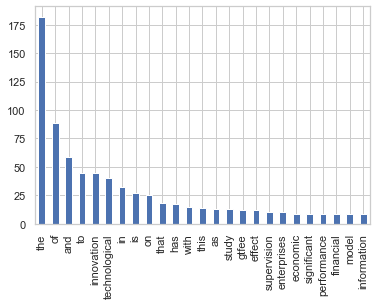

In [172]:
term_document_matrix['total_count'].plot.bar()

### Phrase Modeling: Bigram and Trigram Models

In [173]:
import gensim
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

### Remove Stop Words, Make Bigrams and Lemmatize

In [174]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


stop_words = stopwords.words('english')
stop_words.extend([])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexanderkneis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [212]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_lg")
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [215]:
print(data_lemmatized[0])

['use', 'computer', 'people', 'work', 'life', 'become', 'extensive', 'use', 'improve', 'people', 'live', 'standard', 'also', 'promote', 'development', 'various', 'industry', 'technological', 'progress', 'lay', 'foundation', 'development', 'internet', 'technology', 'maturity', 'network', 'technology', 'regional', 'economy', 'also', 'develop', 'well', 'maintain', 'relatively', 'high', 'economic', 'growth', 'rate', 'reform', 'open', 'internal', 'technological', 'innovation', 'basic', 'guarantee', 'healthy', 'development', 'regional', 'economy', 'show', 'traditional', 'economic', 'growth', 'method', 'long', 'meet', 'economic', 'need', 'modern', 'society', 'sustainable', 'economic', 'advancement', 'technology', 'core', 'main', 'way', 'continue', 'economic', 'development', 'positive', 'promotion', 'effect', 'technological', 'innovation', 'significant', 'regional', 'development', 'profound', 'practical_significance']


In [189]:
processed_texts = [' '.join(tokens) for tokens in data_lemmatized]

In [192]:
processed_texts[0]

'use computer people work life become extensive use improve people live standard also promote development various industry technological progress lay foundation development internet technology maturity network technology regional economy also develop well maintain relatively high economic growth rate reform open internal technological innovation basic guarantee healthy development regional economy show traditional economic growth method long meet economic need modern society sustainable economic advancement technology core main way continue economic development positive promotion effect technological innovation significant regional development profound practical_significance'

In [219]:
doc_vectors = [nlp(doc).vector for doc in processed_texts]

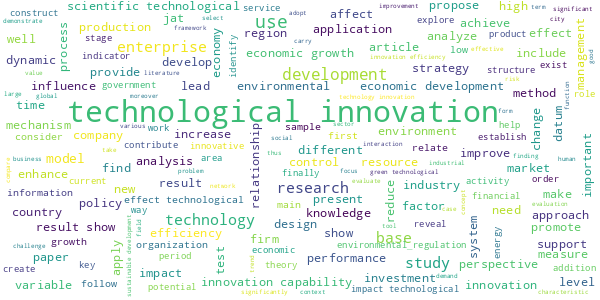

In [193]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(processed_texts)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue',scale=1.5)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Document Term Matrix (after preprocessing)

In [185]:
# Count Vectorizer
vect = CountVectorizer(stop_words=stop_words)  
vects = vect.fit_transform(df['Abstract'])

# Select the first five rows from the data set
td = pd.DataFrame(vects.todense()).iloc[:9]  
td.columns = vect.get_feature_names_out()
term_document_matrix = td.T
term_document_matrix.columns = ['Doc '+str(i) for i in range(1, 10)]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

# Top 25 words 
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:25] 

# Print the first 10 rows 
print(term_document_matrix.drop(columns=['total_count']).head(10))

               Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9
innovation         2      9      7      4      8      5      2      0      8
technological      3      6      8      4      4      5      2      0      8
study              0      1      4      0      1      5      0      2      0
effect             1      0      1      1      1      3      0      0      5
gtfee              0      0      0     12      0      0      0      0      0
supervision        0      0      0      0     10      0      0      0      0
enterprises        0      0      0      0      0      0      0      0     10
economic           5      0      2      0      0      0      1      0      1
financial          0      0      4      4      0      0      0      0      1
analysis           0      0      0      0      0      9      0      0      0


In [186]:
term_document_matrix.head(10)

,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,total_count
innovation,2,9,7,4,8,5,2,0,8,45
technological,3,6,8,4,4,5,2,0,8,40
study,0,1,4,0,1,5,0,2,0,13
effect,1,0,1,1,1,3,0,0,5,12
gtfee,0,0,0,12,0,0,0,0,0,12
supervision,0,0,0,0,10,0,0,0,0,10
enterprises,0,0,0,0,0,0,0,0,10,10
economic,5,0,2,0,0,0,1,0,1,9
financial,0,0,4,4,0,0,0,0,1,9
analysis,0,0,0,0,0,9,0,0,0,9


<AxesSubplot:>

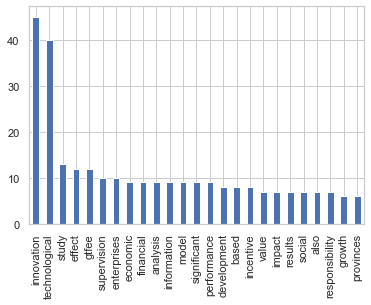

In [187]:
term_document_matrix['total_count'].plot.bar()

### Detect Nouns

In [176]:

def getNouns(text):
    return [token.lower_ for token in nlp(text) if token.pos_ == "NOUN"]

def getCompounds(text):
    return [nlp(text)[tok.i : tok.head.i+1] for tok in [token for token in nlp(text) if token.dep_ == "compound"]]

In [177]:
compounds = df.Abstract.apply(getCompounds)

In [179]:
df['nouns'] = df.Abstract.apply(getNouns)

### Matcher

In [305]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)
pattern = [{'POS':{"IN": ["NOUN", "PROPN"]}},
{"LEMMA": {"NOT_IN": ["Innovation", "Technological"]}}]

matcher.add("noun_matcher", [pattern])

def getNouns(text):
    doc = nlp(text)
    matches = matcher(doc)
    noun_list = []
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # Get string representation
        span = doc[start:end]  # The matched span
        noun_list.append(span.lemma_)
    return noun_list
        

In [306]:
df['nouns'] = df.Title.apply(getNouns)

In [307]:
df_nouns_by_year = df.groupby('Publication Year').agg({'nouns': 'sum'}).reset_index()

In [308]:
df_nouns_by_year.nouns

0    [sustainability of, construction firm, firm to...
1    [ATCI (, Impact of, Innovation on, Regional Ec...
2    [effect of, innovation on, development:, effic...
Name: nouns, dtype: object

In [309]:
from collections import Counter

for index, year in enumerate(df_nouns_by_year['Publication Year']):
    counter = Counter(df_nouns_by_year.nouns[index])
    print("year: ",year, ' -> ', counter.most_common(5))

year:  2020  ->  [('effect of', 16), ('research on', 15), ('innovation in', 14), ('evidence from', 14), ('Impact of', 13)]
year:  2021  ->  [('research on', 31), ('evidence from', 28), ('Innovation and', 26), ('effect of', 22), ('innovation and', 20)]
year:  2022  ->  [('evidence from', 23), ('role of', 15), ('Impact of', 13), ('impact of', 12), ('Innovation and', 10)]


### Ähnlichkeiten mit Sentence Transformers

In [310]:
from sentence_transformers import SentenceTransformer,util
model = SentenceTransformer('all-MiniLM-L6-v2')

In [311]:
df_no_dublicates = df.Abstract.drop_duplicates().reset_index(drop=True)

In [312]:
#Compute embeddings
embeddings = model.encode(df_no_dublicates, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

# for pair in pairs[0:10]:
#     i, j = pair['index']
#     print("{} \t\t {} \t\t Score: {:.4f}".format(df_no_dublicates[i], df_no_dublicates[j], pair['score']))

In [313]:
pairs[0]

{'index': [562, 938], 'score': tensor(0.9998)}

In [314]:
pairs_scores = pd.DataFrame(data=[pair['score'].item() for pair in pairs], columns=['tensor_score'])

In [315]:
pairs_scores

,tensor_score
0,0.999813
1,0.999752
2,0.993804
3,0.993408
4,0.992262
...,...
486586,-0.221735
486587,-0.223391
486588,-0.224580
486589,-0.227816


<AxesSubplot:xlabel='tensor_score', ylabel='Count'>

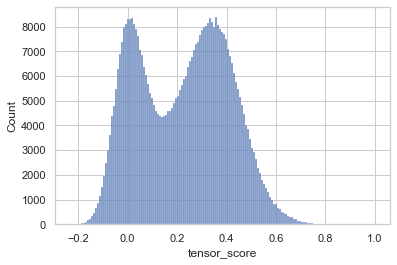

In [316]:
sns.histplot(data=pairs_scores, x='tensor_score')